In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def LeadingOnes(ind):
    return ind.index(0) if 0 in ind else len(ind)

In [3]:
def generate(p):
    def get(pi):
        return 1 if random.random() < pi else 0
    return [get(pi) for pi in p]

In [4]:
def restrict(p, n):
    def get(pi):
        if pi < 1/n:
            return 1/n
        elif pi > (1-1/n):
            return 1-1/n
        else:
            return pi
    return [get(pi) for pi in p]

## UMDA

In [5]:
def mean(Y):
    return [sum([Y[i][j] for i in range(len(Y))])/len(Y) for j in range(len(Y[0]))]

In [6]:
def UMDA(f, n, lmbda, mu):
    t = 0
    p = [1/2 for _ in range(n)]
    while True:
        t += 1
        X = [generate(p) for _ in range(lmbda)]
        X.sort(key = f, reverse = True)
        Y = X[:mu]
        if 0 not in Y[0]:
            break
        p = restrict(mean(Y), n)
    return lmbda*t

In [8]:
UMDA(LeadingOnes, n = 30, lmbda = 100, mu = 43)

6700

In [9]:
delta = 1e-10
zeta = (1-delta)/(4*math.e)

def max_mu(lmbda):
    mu = 1
    while mu < lmbda:
        if math.floor(math.log(zeta*lmbda/mu, 4)) < 0:
            break
        mu += 1
    return mu - 1

def upper_bound(n, lmbda, mu):
    d = math.floor(math.log(zeta*lmbda/mu, 4))
    return lmbda*(math.ceil(n/(d+1)) + math.ceil((n*math.e*math.log(n))/(n-1)))

### Number of fitness function evaluations  in terms of $\mu$

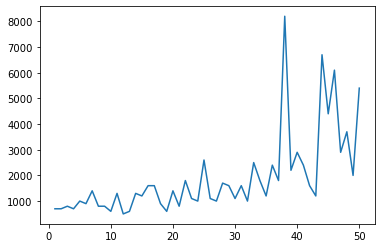

In [10]:
n = 20
lmbda = 100
mu_0 = 50

tab_mu = [mu for mu in range(1, mu_0+1)]
tab_runtime = [UMDA(LeadingOnes, n = n, lmbda = lmbda, mu = mu) for mu in tab_mu]
plt.plot(tab_mu, tab_runtime)
plt.show()

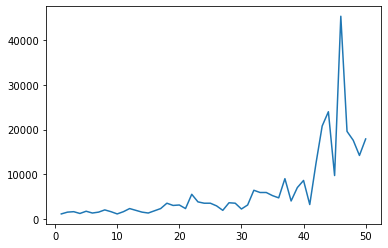

In [20]:
n = 30
lmbda = 100
mu_0 = 50

tab_mu = [mu for mu in range(1, mu_0+1)]
tab_runtime = [UMDA(LeadingOnes, n = n, lmbda = lmbda, mu = mu) for mu in tab_mu]
plt.plot(tab_mu, tab_runtime)
plt.show()

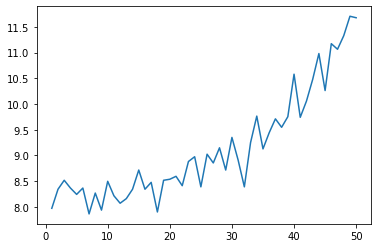

In [21]:
n = 50
lmbda = 100
mu_0 = 50

tab_mu = [mu for mu in range(1, mu_0+1)]
tab_runtime = [math.log(UMDA(LeadingOnes, n = n, lmbda = lmbda, mu = mu)) for mu in tab_mu]
plt.plot(tab_mu, tab_runtime)
plt.show()

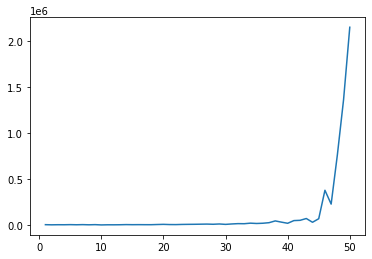

In [294]:
# Takes a a few minutes to run
n = 70
lmbda = 100
mu_0 = 50

tab_mu = [mu for mu in range(1, mu_0+1)]
tab_runtime = [UMDA(LeadingOnes, n = n, lmbda = lmbda, mu = mu) for mu in tab_mu]
plt.plot(tab_mu, tab_runtime)

### Comparing with the upper bound in terms of $n$

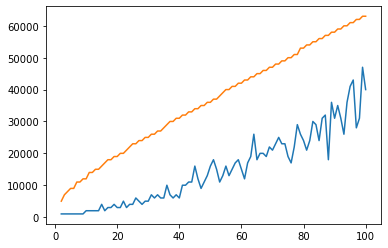

In [22]:
n_0 = 100
lmbda = 1000
mu = 10

tab_n = [n for n in range(2, n_0+1)]
tab_runtime = [UMDA(LeadingOnes, n = n, lmbda = lmbda, mu = mu) for n in tab_n]
tab_upper_bound = [upper_bound(n = n, lmbda = lmbda, mu = mu) for n in tab_n]
plt.plot(tab_n, tab_runtime)
plt.plot(tab_n, tab_upper_bound)
plt.show()

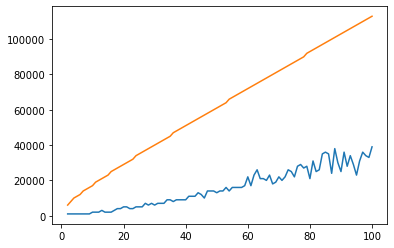

In [23]:
n_0 = 100
lmbda = 1000
mu = 50

tab_n = [n for n in range(2, n_0+1)]
tab_runtime = [UMDA(LeadingOnes, n = n, lmbda = lmbda, mu = mu) for n in tab_n]
tab_upper_bound = [upper_bound(n = n, lmbda = lmbda, mu = mu) for n in tab_n]
plt.plot(tab_n, tab_runtime)
plt.plot(tab_n, tab_upper_bound)
plt.show()

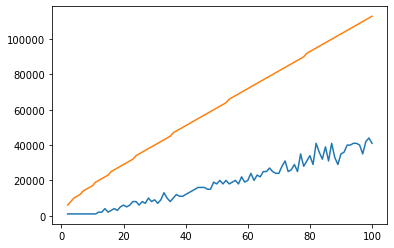

In [24]:
n_0 = 100
lmbda = 1000
mu = max_mu(lmbda)

tab_n = [n for n in range(2, n_0+1)]
tab_runtime = [UMDA(LeadingOnes, n = n, lmbda = lmbda, mu = mu) for n in tab_n]
tab_upper_bound = [upper_bound(n = n, lmbda = lmbda, mu = mu) for n in tab_n]
plt.plot(tab_n, tab_runtime)
plt.plot(tab_n, tab_upper_bound)
plt.show()

### Visualizing $\mu_{max}(\lambda)$:

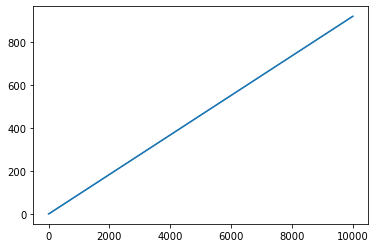

In [25]:
lmbda_0 = 10000
mu = max_mu(lmbda)

tab_lmbda = [lmbda for lmbda in range(1, lmbda_0+1)]
tab_max_mu = [max_mu(lmbda) for lmbda in tab_lmbda]
plt.plot(tab_lmbda, tab_max_mu)
plt.show()

In fact, we must have:

$$
\log_4(\zeta \frac{\lambda}{\mu}) \geq 0
$$

Hence:

$$
\frac{\mu}{\lambda} \leq \zeta = \frac{1-\delta}{4e} \leq \frac{1}{4e} \approx 0.092
$$

## PBIL

In the following, we only consider weights $\{\gamma_i\}_{i \geq 1}$.

In [7]:
## Example weights
def uniform_weights(mu):
    """
    This gives UMDA.
    """
    return [1/mu for _ in range(mu)]

def linearly_decreasing_weights(mu):
    """
    w_0 = 1.5 * mu
    w_mu = 0.5 * mu
    """
    return [-(i+0.5)/(mu**2)+1.5/mu for i in range(mu)]

def inverse_decreasing_weights(mu):
    res = [1 for _ in range(mu)]
    n = len(res)//2
    while n > 0:
        for i in range(n):
            res[i] = 1.2*res[i]
        n = n//2
    return [el/sum(res) for el in res]

def variance(weights):
    """
    sum of the {gamma_i}s squared
    """
    return sum([w**2 for w in weights])

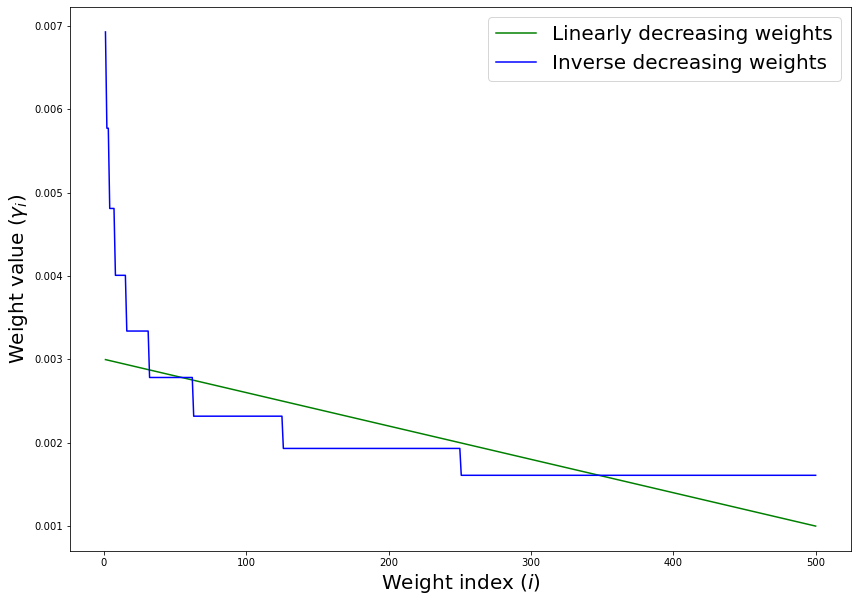

In [8]:
mu_0 = 500

tab_mu = [mu for mu in range(1, mu_0+1)]
plt.figure(figsize=(14, 10))
#plt.plot(tab_mu, uniform_weights(mu_0), 'red', label=f'Uniform weights')
plt.plot(tab_mu, linearly_decreasing_weights(mu_0), 'green', label=f'Linearly decreasing weights')
plt.plot(tab_mu, inverse_decreasing_weights(mu_0), 'blue', label=f'Inverse decreasing weights')
#plt.title("Different weight distributions\n", font={'size':20})
plt.ylabel("Weight value ($\gamma_i$)", font={'size':20})
plt.xlabel("Weight index ($i$)", font={'size':20})
plt.legend(prop={'size': 20})
plt.show()

In [9]:
def weighted_average(Y, weights):
    assert len(weights) == len(Y)
    assert abs(sum(weights) - 1) < 0.001
    return [sum([Y[i][j]*weights[i] for i in range(len(Y))]) for j in range(len(Y[0]))]

In [10]:
def PBIL_once(f, n, lmbda, mu, weights_fn):
    t = 0
    p = [1/2 for _ in range(n)]
    weights = weights_fn(mu)
    while True:
        t += 1
        X = [generate(p) for _ in range(lmbda)]
        X.sort(key = f, reverse = True)
        Y = X[:mu]
        if 0 not in Y[0]:
            break
        p = restrict(weighted_average(Y, weights), n)
    return lmbda*t

In [11]:
def PBIL(f, n, lmbda, mu, weights_fn):
    return sum([PBIL_once(f, n, lmbda, mu, weights_fn) for _ in range(5)])/5

In [12]:
PBIL(LeadingOnes, n = 30, lmbda = 100, mu = 43, weights_fn=uniform_weights)

7720.0

### Number of fitness function evaluations  in terms of $\mu$

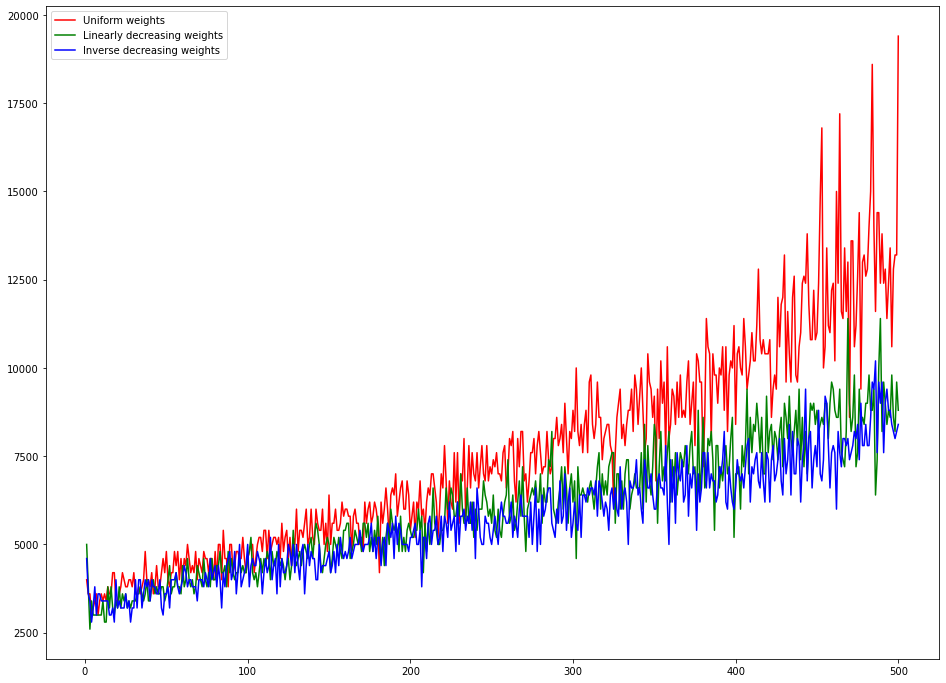

In [13]:
n = 20
lmbda = 1000
mu_0 = 500

tab_mu = [mu for mu in range(1, mu_0+1)]
tab_runtime_uniform = [PBIL(LeadingOnes, n = n, lmbda = lmbda, mu = mu, weights_fn=uniform_weights) for mu in tab_mu]
tab_runtime_linear = [PBIL(LeadingOnes, n = n, lmbda = lmbda, mu = mu, weights_fn=linearly_decreasing_weights) for mu in tab_mu]
tab_runtime_inverse = [PBIL(LeadingOnes, n = n, lmbda = lmbda, mu = mu, weights_fn=inverse_decreasing_weights) for mu in tab_mu]
plt.figure(figsize=(16, 12))
plt.plot(tab_mu, tab_runtime_uniform, 'red', label=f'Uniform weights')
plt.plot(tab_mu, tab_runtime_linear, 'green', label=f'Linearly decreasing weights')
plt.plot(tab_mu, tab_runtime_inverse, 'blue', label=f'Inverse decreasing weights')
plt.legend()
plt.show()

### Comparing with the upper bound in terms of $n$

In [ ]:
n_0 = 60
lmbda = 1000
mu = 50

tab_n = [n for n in range(2, n_0+1)]
tab_runtime_uniform = [PBIL(LeadingOnes, n = n, lmbda = lmbda, mu = mu, weights_fn=uniform_weights) for n in tab_n]
tab_runtime_linear = [PBIL(LeadingOnes, n = n, lmbda = lmbda, mu = mu, weights_fn=linearly_decreasing_weights) for n in tab_n]
tab_runtime_inverse = [PBIL(LeadingOnes, n = n, lmbda = lmbda, mu = mu, weights_fn=inverse_decreasing_weights) for n in tab_n]
tab_upper_bound = [upper_bound(n = n, lmbda = lmbda, mu = mu) for n in tab_n]
plt.figure(figsize=(16, 12))
plt.plot(tab_n, tab_runtime_uniform, 'red', label=f'Uniform weights')
plt.plot(tab_n, tab_runtime_linear, 'green', label=f'Linearl weights')
plt.plot(tab_n, tab_runtime_inverse, 'blue', label=f' weights')
plt.plot(tab_n, tab_upper_bound, 'orange', label=f'Upper bound')
plt.legend()
plt.show()

### Comparing two weight distributions with the same $\sum_{i=0}^{\lambda}\gamma_i^2$:

We start by extending the classes of linearly decreasing and inverse decreasing weights:

In [14]:
def linearly_decreasing_weights(mu, alpha = 0.5):
    """
    alpha in (0, 1)
    w_0 = (1 + alpha) / mu
    w_mu = (1 - alpha) / mu
    """
    w_0 = (1 + alpha) / mu
    w_mu = (1 - alpha) / mu
    slope = (w_mu - w_0)/mu
    intercept = w_0
    return [(i+0.5)*slope+w_0 for i in range(mu)]

def inverse_decreasing_weights(mu, beta = 1.2):
    """
    beta should be close to 0 to minimize genetic drift (generally beta < 1)
    """
    res = [1 for _ in range(mu)]
    n = len(res)//2
    while n > 0:
        for i in range(n):
            res[i] = (1+beta)*res[i]
        n = n//2
    return [el/sum(res) for el in res]

In [15]:
def find_inverse_decreasing_with_given_variance(mu, var):
    beta = 0
    weights = inverse_decreasing_weights(mu, beta)
    if variance(weights) > var:
        raise Exception
    n = 1
    while abs(variance(weights) - var) > 1e-4:
        if variance(weights) < var:
            beta += 10**(-n)
        else:
            beta -= 10**(-n)
            n += 1
            beta += 10**(-n)
        weights = inverse_decreasing_weights(mu, beta)
    return weights

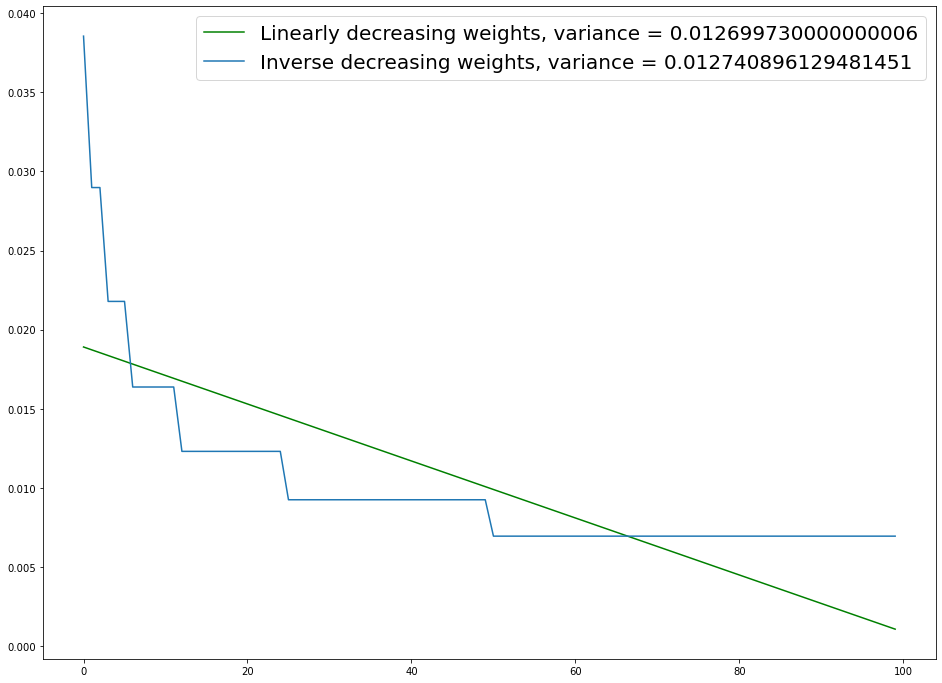

In [16]:
alpha = 0.9
mu = 100

linear_weights = linearly_decreasing_weights(mu, alpha)
linear_variance = variance(linear_weights)
inverse_weights = find_inverse_decreasing_with_given_variance(mu, linear_variance)
inverse_variance = variance(inverse_weights)

plt.figure(figsize=(16, 12))
tab_n = [n for n in range(mu)]
plt.plot(tab_n, linear_weights, 'green', label=f'Linearly decreasing weights, variance = {linear_variance}')
plt.plot(tab_n, inverse_weights, label=f'Inverse decreasing weights, variance = {inverse_variance}')
plt.legend(prop={'size': 20})
plt.show()

In [17]:
def get_inverse_from_alpha(mu, alpha):
    return find_inverse_decreasing_with_given_variance(mu, variance(linearly_decreasing_weights(mu, alpha)))

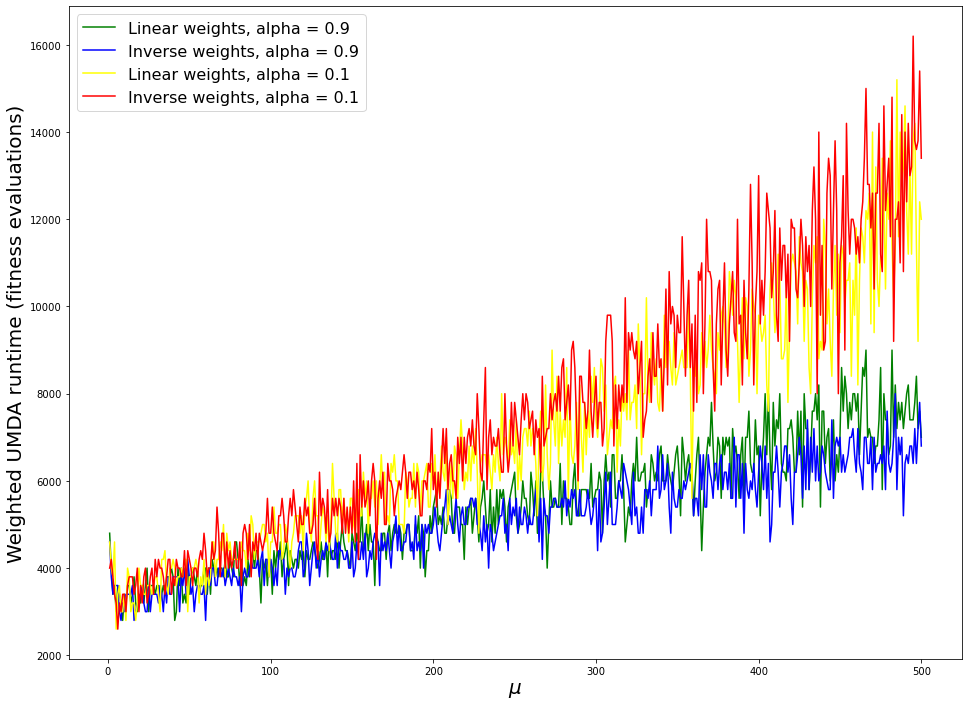

In [19]:
n = 20
lmbda = 1000
mu_0 = 500
plt.figure(figsize=(16, 12))

## PART 1
alpha = 0.9

fn_linear = lambda x: linearly_decreasing_weights(x, alpha)
fn_inverse = lambda x: get_inverse_from_alpha(x, alpha)

tab_mu = [mu for mu in range(1, mu_0+1)]
tab_runtime_linear = [PBIL(LeadingOnes, n = n, lmbda = lmbda, mu = mu, weights_fn=fn_linear) for mu in tab_mu]
tab_runtime_inverse = [PBIL(LeadingOnes, n = n, lmbda = lmbda, mu = mu, weights_fn=fn_inverse) for mu in tab_mu]
plt.plot(tab_mu, tab_runtime_linear, 'green', label=f'Linear weights, alpha = {alpha}')
plt.plot(tab_mu, tab_runtime_inverse, 'blue', label=f'Inverse weights, alpha = {alpha}')

## PART 2
alpha = 0.1

fn_linear = lambda x: linearly_decreasing_weights(x, alpha)
fn_inverse = lambda x: get_inverse_from_alpha(x, alpha)

tab_mu = [mu for mu in range(1, mu_0+1)]
tab_runtime_linear = [PBIL(LeadingOnes, n = n, lmbda = lmbda, mu = mu, weights_fn=fn_linear) for mu in tab_mu]
tab_runtime_inverse = [PBIL(LeadingOnes, n = n, lmbda = lmbda, mu = mu, weights_fn=fn_inverse) for mu in tab_mu]
plt.plot(tab_mu, tab_runtime_linear, 'yellow', label=f'Linear weights, alpha = {alpha}')
plt.plot(tab_mu, tab_runtime_inverse, 'red', label=f'Inverse weights, alpha = {alpha}')
plt.legend(prop={'size': 16})
plt.xlabel("$\mu$", font={'size':20})
plt.ylabel("Weighted UMDA runtime (fitness evaluations)", font={'size':20})
plt.show()

### Evolution in terms of $n$ using two weight distributions with the same $\sum_{i=0}^{\lambda}\gamma_i^2$:

In [ ]:
n_0 = 60
lmbda = 1000
mu = 100
plt.figure(figsize=(16, 12))

## PART 1
alpha = 0.9

fn_linear = lambda x: linearly_decreasing_weights(x, alpha)
fn_inverse = lambda x: get_inverse_from_alpha(x, alpha)

tab_n = [n for n in range(2, n_0+1)]
tab_runtime_linear = [PBIL(LeadingOnes, n = n, lmbda = lmbda, mu = mu, weights_fn=fn_linear) for n in tab_n]
tab_runtime_inverse = [PBIL(LeadingOnes, n = n, lmbda = lmbda, mu = mu, weights_fn=fn_inverse) for n in tab_n]
plt.plot(tab_n, tab_runtime_linear, 'green', label=f'Linear weights, variance = {variance(fn_linear(mu))}')
plt.plot(tab_n, tab_runtime_inverse, 'blue', label=f'Inverse weights, variance {variance(fn_linear(mu))}')

## PART 2
alpha = 0.1

fn_linear = lambda x: linearly_decreasing_weights(x, alpha)
fn_inverse = lambda x: get_inverse_from_alpha(x, alpha)

tab_n = [n for n in range(2, n_0+1)]
tab_runtime_linear = [PBIL(LeadingOnes, n = n, lmbda = lmbda, mu = mu, weights_fn=fn_linear) for n in tab_n]
tab_runtime_inverse = [PBIL(LeadingOnes, n = n, lmbda = lmbda, mu = mu, weights_fn=fn_inverse) for n in tab_n]
plt.plot(tab_n, tab_runtime_linear, 'yellow', label=f'Linear weights, variance = {variance(fn_linear(mu))}')
plt.plot(tab_n, tab_runtime_inverse, 'red', label=f'Inverse weights, variance {variance(fn_linear(mu))}')

plt.legend()
plt.show()

## Testing on DeceptiveLeadingBlocks

In [ ]:
def DB(block):
    assert len(block) == 2, "Block should have length 2"
    if block[0] == block[1]:
        if block[0] == 1:
            return 2
        return 1
    return 0

def DeceptiveLeadingBlocks(ind):
    if
    n = len(ind)
    
    for i in range(n//2):
        if DB([ind[2*i], ind[2*i+1]]) != 2:
            break
    
    if i == n//2:
        return n
    
    return 2*i + DB([ind[2*i], ind[2*i+1]])